**Import thư viện**

In [1]:
#import các thư viện 
import tensorflow as tf #thư viện tensorflow
import keras #Thư viện keras
import numpy as np #Thư viện numpy|
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
#Kiểm tra version của keras
keras.__version__

'2.5.0'

**Pre-processing**

Trước khi cho ảnh vào model chúng ta nên rescale vào đoạn [0,1] để giữ weights không quá lớn. 

validation sẽ được dùng như một tập dữ liệu để tune các thông số trên đó. Khi đã train xong trên tập validation, chúng ta sẽ tiến hành kiểm thử trên tập test

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


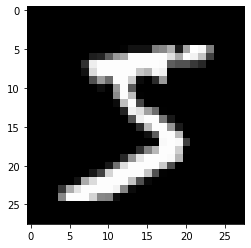

In [4]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào (dùng ảnh trắng đen)
## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ validation/train=1/9

### 1. Hãy tạo và huấn luyện một mạng no-ron theo cấu trúc sau trên tập MNIST 

In [5]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))



## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(inputs)
print("Kích thước flatten: {}".format(flatten.shape))

dense1= keras.layers.Dense(units=200,activation="relu")(flatten)
print("Kích thước fc1: {}".format(dense1.shape))

dense2= keras.layers.Dense(units=100,activation="relu")(dense1)
print("Kích thước fc2: {}".format(dense2.shape))

dense3= keras.layers.Dense(units=50,activation="relu")(dense2)
print("Kích thước fc3: {}".format(dense3.shape))

dense4= keras.layers.Dense(units=20,activation="relu")(dense3)
print("Kích thước fc4: {}".format(dense4.shape))


## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
    ### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
softmax = keras.layers.Dense(units=10, activation='softmax')(dense4)



## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Kích thước sau reshape: (None, 28, 28, 1)
Kích thước flatten: (None, 784)
Kích thước fc1: (None, 200)
Kích thước fc2: (None, 100)
Kích thước fc3: (None, 50)
Kích thước fc4: (None, 20)
Cấu trúc của model: 
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)      

In [6]:
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 11s 2ms/step - loss: 0.6382 - accuracy: 0.8046 - val_loss: 0.1686 - val_accuracy: 0.9505
Epoch 2/10
540/540 [==============================] - 1s 1ms/step - loss: 0.1242 - accuracy: 0.9634 - val_loss: 0.1170 - val_accuracy: 0.9642
Epoch 3/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.1010 - val_accuracy: 0.9693
Epoch 4/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0571 - accuracy: 0.9830 - val_loss: 0.0988 - val_accuracy: 0.9718
Epoch 5/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.1056 - val_accuracy: 0.9698
Epoch 6/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.1179 - val_accuracy: 0.9693
Epoch 7/10
540/540 [==============================] - 1s 1ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.1035 - val_accuracy: 0.9722
Epoch

### 2. Nêu cách tính các kết quả có trong Param # ở câu 1

Ta tính theo công thức: param = output * (input + 1) $\\$

157000 = 200*(784 + 1)

20100 = 100*(20 + 1)

5050 = 50*(100 + 1)

1020 = 20*(50 + 1)

210 = 10*(20 + 1)

### 3. Cấu trúc ở câu 1 có thể được áp dụng cho bài toán regression được không, nếu có thì phải thay đổi như thế nào?

Cấu trúc của bài 1 ta có thể áp dúng được cho bài toán regression.

Để áp dụng, ta cần thay thế hàm softmax bằng hàm activation (là sigmoid đối với bài toán logistic regression) hoặc hàm loss đới với linear regression.

### 4. Thiết kế một mạng Convolution 2D

In [7]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))

## Tạo Convolutional Layer
### fileters: số lượng filter
### kernel_size: kích thước của filter
### strides: bước dịch của filter khi tính convolution
### padding: thêm số 0 hoặc không tính khi tính filter ở biên
    #### có 2 options: "same" là sẽ giữ nguyên kích thước ảnh sau khi qua lớp Convolution, "valid" kích thước ảnh sẽ đc tính đúng như công thức
### activation: hàm kích hoạt của lớp convolution
conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)
print("Kích thước conv: {}, chiều cuối cùng chính là số filter".format(conv.shape))

## Maxpooling
### pool_size: kích thước pool để lấy max
### strides: bước dịch của pool 
maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)
print("Kích thước sau maxpool: {}".format(maxpool.shape))


conv1 = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='valid',
                                 activation=tf.nn.relu)(maxpool)

maxpool1 = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv1)
## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(maxpool1)
print("Kích thước flatten: {}".format(flatten.shape))


dense1= keras.layers.Dense(units=40,activation="relu")(flatten)
print("Kích thước fc1: {}".format(dense1.shape))

dense2= keras.layers.Dense(units=20,activation="relu")(dense1)
print("Kích thước fc2: {}".format(dense2.shape))

## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
    ### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
softmax = keras.layers.Dense(units=10, activation='softmax')(dense2)



## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Kích thước sau reshape: (None, 28, 28, 1)
Kích thước conv: (None, 28, 28, 20), chiều cuối cùng chính là số filter
Kích thước sau maxpool: (None, 14, 14, 20)
Kích thước flatten: (None, 500)
Kích thước fc1: (None, 40)
Kích thước fc2: (None, 20)
Cấu trúc của model: 
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
__________________________

In [8]:
####Training####
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 14s 23ms/step - loss: 0.7373 - accuracy: 0.7477 - val_loss: 0.1115 - val_accuracy: 0.9692
Epoch 2/10
540/540 [==============================] - 12s 23ms/step - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.0865 - val_accuracy: 0.9752
Epoch 3/10
540/540 [==============================] - 12s 23ms/step - loss: 0.0668 - accuracy: 0.9799 - val_loss: 0.0868 - val_accuracy: 0.9740
Epoch 4/10
540/540 [==============================] - 12s 22ms/step - loss: 0.0549 - accuracy: 0.9836 - val_loss: 0.0748 - val_accuracy: 0.9780
Epoch 5/10
540/540 [==============================] - 12s 22ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0583 - val_accuracy: 0.9833
Epoch 6/10
540/540 [==============================] - 12s 21ms/step - loss: 0.0364 - accuracy: 0.9884 - val_loss: 0.0460 - val_accuracy: 0.9875
Epoch 7/10
540/540 [==============================] - 12s 22ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0501 - val_accuracy: